## F-scoreで評価する

今回はPositive＝間に合わないと出力という形でひっくり返して考え直していく．
1. True-Positive : 出力「間に合わない」→真に「間に合わない」
2. False-Positive: 出力「間に合わない」→本当は「間に合う」
3. True-Negative : 出力「間にあう」→真に「間に合う」
4. False-Negative: 出力「間に合う」→本当は「間に合わない」

今回のケーススタディでは，間に合わないのに間に合うと出力されることを避けたい（FNを小さくしたい）\
したがって，再現率を重視して出力する．\
この際．βの値は{1.0, 2.0, 5.0, 10.0, 100.0}で計算することとする．

### 前提条件

In [2]:
# モジュールの導入
import numpy as np
from scipy.special import lambertw as LW
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import statistics
import pandas as pd

In [3]:
# 重みづけの変数β
beta = [1.0, 2.0, 5.0, 10.0, 100.0]

In [4]:
path_w_1 = 'f_score_1_reverse.txt'
path_w_10 = 'f_score_10_reverse.txt'

### 効用関数1：1


In [5]:
run ./utility_1_1_makef_.ipynb

done


In [6]:
pd.DataFrame(data=list_utility_1, index=index1, columns=columns1)

,"(16.0, 0, 17)","(16.666666666666668, 0, 17)","(17.333333333333332, 0, 17)","(18.0, 0, 17)","(18.666666666666668, 0, 17)","(19.333333333333332, 0, 17)","(20.666666666666668, 0, 17)","(21.333333333333332, 0, 17)","(22.0, 0, 17)","(22.666666666666668, 0, 17)","(23.333333333333332, 0, 17)","(24.0, 0, 17)"
eps_z= 0.1,"(3313, 6687)","(3291, 6709)","(3269, 6731)","(3259, 6741)","(3235, 6765)","(3217, 6783)","(3170, 6830)","(3157, 6843)","(3140, 6860)","(3125, 6875)","(3101, 6899)","(3084, 6916)"
eps_z= 0.2,"(4299, 5701)","(4223, 5777)","(4152, 5848)","(4068, 5932)","(4005, 5995)","(3950, 6050)","(3795, 6205)","(3717, 6283)","(3651, 6349)","(3581, 6419)","(3510, 6490)","(3433, 6567)"
eps_z= 0.6931471805599453,"(6600, 3400)","(6314, 3686)","(6004, 3996)","(5707, 4293)","(5394, 4606)","(5026, 4974)","(4309, 5691)","(3974, 6026)","(3673, 6327)","(3374, 6626)","(3091, 6909)","(2825, 7175)"
eps_z= 1.3862943611198906,"(8162, 1838)","(7759, 2241)","(7311, 2689)","(6753, 3247)","(6164, 3836)","(5549, 4451)","(4099, 5901)","(3485, 6515)","(2924, 7076)","(2423, 7577)","(1969, 8031)","(1579, 8421)"
eps_z= 3.0,"(9586, 414)","(9364, 636)","(8975, 1025)","(8389, 1611)","(7542, 2458)","(6345, 3655)","(3453, 6547)","(2311, 7689)","(1444, 8556)","(915, 9085)","(557, 9443)","(344, 9656)"
eps_z= 4,"(9858, 142)","(9692, 308)","(9463, 537)","(8986, 1014)","(8141, 1859)","(6777, 3223)","(3049, 6951)","(1718, 8282)","(920, 9080)","(470, 9530)","(240, 9760)","(118, 9882)"
eps_z= 10,"(10000, 0)","(9998, 2)","(9988, 12)","(9949, 51)","(9696, 304)","(8637, 1363)","(1262, 8738)","(243, 9757)","(41, 9959)","(7, 9993)","(2, 9998)","(0, 10000)"
eps_z= 40,"(10000, 0)","(10000, 0)","(10000, 0)","(10000, 0)","(10000, 0)","(9989, 11)","(7, 9993)","(0, 10000)","(0, 10000)","(0, 10000)","(0, 10000)","(0, 10000)"


In [7]:
TN, FN, TP, FP = 0, 0, 0, 0
T_Negative = []
F_Negative = []
T_Positive = []
F_Positive = []

for i in range(len(epsilon_z)):
    for j in range(len(POI_data)):
        if j < 6:
            TN = TN + list_utility_1[i][j][0]
            FP = FP + list_utility_1[i][j][1]
        elif j >= 6:
            TP = TP + list_utility_1[i][j][1] 
            FN = FN + list_utility_1[i][j][0]    
    T_Positive.append(TP/(Num*6))
    T_Negative.append(TN/(Num*6))
    F_Positive.append(FP/(Num*6))
    F_Negative.append(FN/(Num*6))
    TN, FN, TP, FP = 0, 0, 0, 0

f_score = []
temp_list = []
    
for j in range(len(beta)):
    for i in range(len(epsilon_z)):
        temp_list.append(((1+beta[j]**2) * T_Positive[i]) / ((1+beta[j]**2)*T_Positive[i] + (beta[j]**2)* F_Negative[i] + F_Positive[i]))
    f_score.append(temp_list)
    temp_list = []
    
beta1 = []
for i in range(len(beta)):
    beta1.append("$\beta$ = "+str(beta[i]))
    
col = []
for i in range(len(epsilon_z)):
    col.append("varepsilon = "+str(epsilon_z[i]*2.0))

score = pd.DataFrame(data=f_score, index=beta1, columns=col)
print(score.to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  varepsilon = 0.1 &  varepsilon = 0.2 &  varepsilon = 0.6931471805599453 &  varepsilon = 1.3862943611198906 &  varepsilon = 3.0 &  varepsilon = 4.0 &  varepsilon = 10.0 &  varepsilon = 40.0 \\
\midrule
\eta\$ = 1.0   &          0.582085 &          0.573479 &                         0.626535 &                         0.714496 &          0.844148 &          0.887217 &           0.972649 &           0.999850 \\
\eta\$ = 2.0   &          0.640827 &          0.610827 &                         0.638012 &                         0.720969 &          0.847411 &          0.889732 &           0.973509 &           0.999870 \\
\eta\$ = 5.0   &          0.677650 &          0.633025 &                         0.644368 &                         0.724503 &          0.849178 &          0.891092 &           0.973973 &           0.999881 \\
\eta\$ = 10.0  &          0.684605 &          0.637118 &                         0.645505 &                         0.725132 & 

/var/folders/ln/474st4yn1571hxwpq8vtklx40000gn/T/ipykernel_15736/2249641758.py:39: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(score.to_latex())


### 効用関数10:1

In [8]:
run ./utility_10_1_makef_.ipynb

done


In [9]:
pd.DataFrame(data=list_utility_10, index=index1, columns=columns1)

,"(16.0, 0, 17)","(16.666666666666668, 0, 17)","(17.333333333333332, 0, 17)","(18.0, 0, 17)","(18.666666666666668, 0, 17)","(19.333333333333332, 0, 17)","(20.666666666666668, 0, 17)","(21.333333333333332, 0, 17)","(22.0, 0, 17)","(22.666666666666668, 0, 17)","(23.333333333333332, 0, 17)","(24.0, 0, 17)"
eps_z= 0.1,"(620, 9380)","(615, 9385)","(609, 9391)","(603, 9397)","(599, 9401)","(594, 9406)","(594, 9406)","(592, 9408)","(592, 9408)","(590, 9410)","(587, 9413)","(585, 9415)"
eps_z= 0.2,"(826, 9174)","(811, 9189)","(788, 9212)","(773, 9227)","(754, 9246)","(739, 9261)","(723, 9277)","(714, 9286)","(706, 9294)","(692, 9308)","(678, 9322)","(663, 9337)"
eps_z= 0.6931471805599453,"(1376, 8624)","(1299, 8701)","(1232, 8768)","(1152, 8848)","(1084, 8916)","(1000, 9000)","(861, 9139)","(788, 9212)","(734, 9266)","(673, 9327)","(591, 9409)","(534, 9466)"
eps_z= 1.3862943611198906,"(1938, 8062)","(1762, 8238)","(1596, 8404)","(1432, 8568)","(1281, 8719)","(1118, 8882)","(824, 9176)","(693, 9307)","(554, 9446)","(466, 9534)","(370, 9630)","(293, 9707)"
eps_z= 3.0,"(3142, 6858)","(2812, 7188)","(2423, 7577)","(2047, 7953)","(1676, 8324)","(1330, 8670)","(685, 9315)","(438, 9562)","(266, 9734)","(166, 9834)","(103, 9897)","(74, 9926)"
eps_z= 4,"(3803, 6197)","(3362, 6638)","(2922, 7078)","(2429, 7571)","(1928, 8072)","(1447, 8553)","(584, 9416)","(320, 9680)","(166, 9834)","(95, 9905)","(52, 9948)","(30, 9970)"
eps_z= 10,"(6567, 3433)","(5941, 4059)","(5220, 4780)","(4377, 5623)","(3370, 6630)","(2182, 7818)","(240, 9760)","(52, 9948)","(11, 9989)","(1, 9999)","(1, 9999)","(1, 9999)"
eps_z= 40,"(9832, 168)","(9671, 329)","(9366, 634)","(8777, 1223)","(7564, 2436)","(5225, 4775)","(1, 9999)","(0, 10000)","(0, 10000)","(0, 10000)","(0, 10000)","(0, 10000)"


In [10]:
TN, FN, TP, FP = 0, 0, 0, 0
T_Negative = []
F_Negative = []
T_Positive = []
F_Positive = []

for i in range(len(epsilon_z)):
    for j in range(len(POI_data)):
        if j < 6:
            TN = TN + list_utility_10[i][j][0]
            FP = FP + list_utility_10[i][j][1]
        elif j >= 6:
            TP = TP + list_utility_10[i][j][1] 
            FN = FN + list_utility_10[i][j][0]    
    T_Positive.append(TP/(Num*6))
    T_Negative.append(TN/(Num*6))
    F_Positive.append(FP/(Num*6))
    F_Negative.append(FN/(Num*6))
    TN, FN, TP, FP = 0, 0, 0, 0

f_score = []
temp_list = []
    
for j in range(len(beta)):
    for i in range(len(epsilon_z)):
        temp_list.append(((1+beta[j]**2) * T_Positive[i]) / ((1+beta[j]**2)*T_Positive[i] + (beta[j]**2)* F_Negative[i] + F_Positive[i]))
    f_score.append(temp_list)
    temp_list = []
    
beta1 = []
for i in range(len(beta)):
    beta1.append("$\beta$ = "+str(beta[i]))
    
col = []
for i in range(len(epsilon_z)):
    col.append("varepsilon = "+str(epsilon_z[i]*2.0))

score = pd.DataFrame(data=f_score, index=beta1, columns=col)
print(score.to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  varepsilon = 0.1 &  varepsilon = 0.2 &  varepsilon = 0.6931471805599453 &  varepsilon = 1.3862943611198906 &  varepsilon = 3.0 &  varepsilon = 4.0 &  varepsilon = 10.0 &  varepsilon = 40.0 \\
\midrule
\eta\$ = 1.0   &          0.653397 &          0.652405 &                         0.661849 &                         0.677509 &          0.706973 &          0.721507 &           0.785256 &           0.926168 \\
\eta\$ = 2.0   &          0.800125 &          0.794912 &                         0.800442 &                         0.816860 &          0.844860 &          0.856802 &           0.898906 &           0.969089 \\
\eta\$ = 5.0   &          0.910182 &          0.900872 &                         0.902167 &                         0.918595 &          0.944001 &          0.953032 &           0.974879 &           0.993890 \\
\eta\$ = 10.0  &          0.932869 &          0.922615 &                         0.922904 &                         0.939278 & 

/var/folders/ln/474st4yn1571hxwpq8vtklx40000gn/T/ipykernel_15736/3217075009.py:39: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(score.to_latex())


In [30]:
beta1_list = []
beta2_list = []
beta5_list = []
beta10_list = []
beta100_list = []

eps01_list = []
eps02_list = []
eps07_list = []
eps14_list = []
eps30_list = []
eps40_list = []
eps100_list = []
eps400_list = []

In [31]:
eps = []
for i in range(len(epsilon_z)):
    eps.append(epsilon_z[i]*2.0)

In [32]:
TN, FN, TP, FP = 0, 0, 0, 0
T_Negative = []
F_Negative = []
T_Positive = []
F_Positive = []

for i in range(len(epsilon_z)):
    for j in range(len(POI_data)):
        if j < 6:
            TN = TN + list_utility_10[i][j][0]
            FP = FP + list_utility_10[i][j][1]
        elif j >= 6:
            TP = TP + list_utility_10[i][j][1] 
            FN = FN + list_utility_10[i][j][0]    
    T_Positive.append(TP/(Num*6))
    T_Negative.append(TN/(Num*6))
    F_Positive.append(FP/(Num*6))
    F_Negative.append(FN/(Num*6))
    TN, FN, TP, FP = 0, 0, 0, 0

In [33]:
f_score = []
temp_list = []
    
for j in range(len(beta)):
    for i in range(len(epsilon_z)):
        temp_list.append(((1+beta[j]**2) * T_Positive[i]) / ((1+beta[j]**2)*T_Positive[i] + (beta[j]**2)* F_Negative[i] + F_Positive[i]))
    f_score.append(temp_list)
    temp_list = []

In [34]:
for i in range(len(f_score[0])):
    beta1_list.append(f_score[0][i])
for i in range(len(f_score[1])):
    beta2_list.append(f_score[1][i])
for i in range(len(f_score[2])):
    beta5_list.append(f_score[2][i])
for i in range(len(f_score[3])):
    beta10_list.append(f_score[3][i])
for i in range(len(f_score[4])):
    beta100_list.append(f_score[4][i])

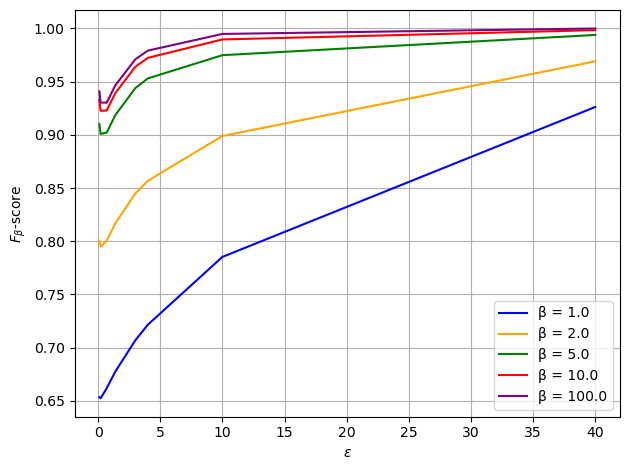

In [35]:
fig, ax = plt.subplots()
c1,c2,c3,c4,c5 = "blue","orange","green","red","purple"
l1,l2,l3,l4,l5 = "\u03b2 = 1.0", "\u03b2 = 2.0", "\u03b2 = 5.0", "\u03b2 = 10.0", "\u03b2 = 100.0"

ax.set_xlabel('$\u03b5$')
ax.set_ylabel('$F_\u03b2$'+'-score')
ax.grid()
ax.plot(eps, beta1_list, color=c1, label=l1)
ax.plot(eps, beta2_list, color=c2, label=l2)
ax.plot(eps, beta5_list, color=c3, label=l3)
ax.plot(eps, beta10_list, color=c4, label=l4)
ax.plot(eps, beta100_list, color=c5, label=l5)
ax.legend(loc=0)
fig.tight_layout()
plt.savefig('eps-fbeta10_sev.png')
plt.show()

In [36]:
f_score1 = []
temp_list = []

for i in range(len(epsilon_z)):
    for j in range(len(beta)):
        temp_list.append(((1+beta[j]**2) * T_Positive[i]) / ((1+beta[j]**2)*T_Positive[i] + (beta[j]**2)* F_Negative[i] + F_Positive[i]))
    f_score1.append(temp_list)
    temp_list = []

In [37]:
for i in range(len(f_score1[0])):
    eps01_list.append(f_score1[0][i])
for i in range(len(f_score1[1])):
    eps02_list.append(f_score1[1][i])
for i in range(len(f_score1[2])):
    eps07_list.append(f_score1[2][i])
for i in range(len(f_score1[3])):
    eps14_list.append(f_score1[3][i])
for i in range(len(f_score1[4])):
    eps30_list.append(f_score1[4][i])
for i in range(len(f_score1[5])):
    eps40_list.append(f_score1[5][i])
for i in range(len(f_score1[6])):
    eps100_list.append(f_score1[6][i])
for i in range(len(f_score1[7])):
    eps400_list.append(f_score1[7][i])

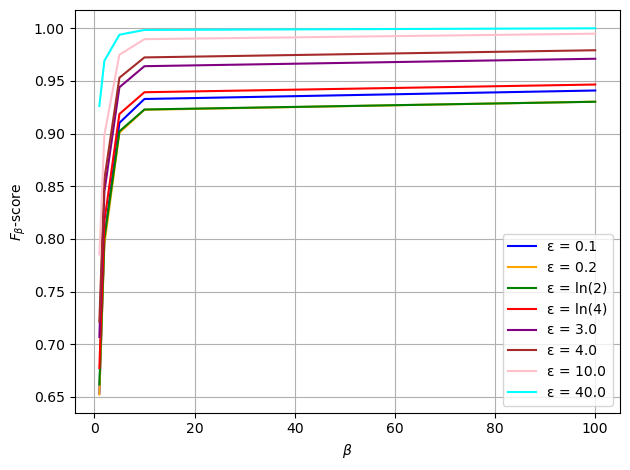

In [39]:
fig, ax = plt.subplots()
c1,c2,c3,c4,c5,c6,c7,c8 = "blue","orange","green","red","purple","brown","pink","cyan"
l1,l2,l3,l4,l5,l6,l7,l8 = "\u03b5 = 0.1", "\u03b5 = 0.2", "\u03b5 = ln(2)", "\u03b5 = ln(4)", "\u03b5 = 3.0", "\u03b5 = 4.0", "\u03b5 = 10.0", "\u03b5 = 40.0"

ax.set_xlabel('$\u03b2$')
ax.set_ylabel('$F_\u03b2$'+'-score')
ax.grid()
#ax.set_xlim(0,10)
ax.plot(beta, eps01_list, color=c1, label=l1)
ax.plot(beta, eps02_list, color=c2, label=l2)
ax.plot(beta, eps07_list, color=c3, label=l3)
ax.plot(beta, eps14_list, color=c4, label=l4)
ax.plot(beta, eps30_list, color=c5, label=l5)
ax.plot(beta, eps40_list, color=c6, label=l6)
ax.plot(beta, eps100_list, color=c7, label=l7)
ax.plot(beta, eps400_list, color=c8, label=l8)
ax.legend(loc=0)
fig.tight_layout()
plt.savefig('beta-fbeta10_sev.png')
plt.show()

In [40]:
beta1_list = []
beta2_list = []
beta5_list = []
beta10_list = []
beta100_list = []

eps01_list = []
eps02_list = []
eps07_list = []
eps14_list = []
eps30_list = []
eps40_list = []
eps100_list = []
eps400_list = []

In [41]:
TN, FN, TP, FP = 0, 0, 0, 0
T_Negative = []
F_Negative = []
T_Positive = []
F_Positive = []

for i in range(len(epsilon_z)):
    for j in range(len(POI_data)):
        if j < 6:
            TN = TN + list_utility_1[i][j][0]
            FP = FP + list_utility_1[i][j][1]
        elif j >= 6:
            TP = TP + list_utility_1[i][j][1] 
            FN = FN + list_utility_1[i][j][0]    
    T_Positive.append(TP/(Num*6))
    T_Negative.append(TN/(Num*6))
    F_Positive.append(FP/(Num*6))
    F_Negative.append(FN/(Num*6))
    TN, FN, TP, FP = 0, 0, 0, 0

In [42]:
f_score = []
temp_list = []
    
for j in range(len(beta)):
    for i in range(len(epsilon_z)):
        temp_list.append(((1+beta[j]**2) * T_Positive[i]) / ((1+beta[j]**2)*T_Positive[i] + (beta[j]**2)* F_Negative[i] + F_Positive[i]))
    f_score.append(temp_list)
    temp_list = []

In [43]:
for i in range(len(f_score[0])):
    beta1_list.append(f_score[0][i])
for i in range(len(f_score[1])):
    beta2_list.append(f_score[1][i])
for i in range(len(f_score[2])):
    beta5_list.append(f_score[2][i])
for i in range(len(f_score[3])):
    beta10_list.append(f_score[3][i])
for i in range(len(f_score[4])):
    beta100_list.append(f_score[4][i])

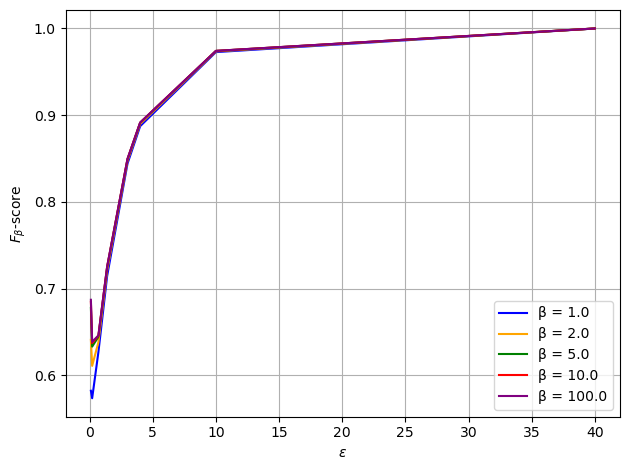

In [44]:
fig, ax = plt.subplots()
c1,c2,c3,c4,c5 = "blue","orange","green","red","purple"
l1,l2,l3,l4,l5 = "\u03b2 = 1.0", "\u03b2 = 2.0", "\u03b2 = 5.0", "\u03b2 = 10.0", "\u03b2 = 100.0"

ax.set_xlabel('$\u03b5$')
ax.set_ylabel('$F_\u03b2$'+'-score')
ax.grid()
ax.plot(eps, beta1_list, color=c1, label=l1)
ax.plot(eps, beta2_list, color=c2, label=l2)
ax.plot(eps, beta5_list, color=c3, label=l3)
ax.plot(eps, beta10_list, color=c4, label=l4)
ax.plot(eps, beta100_list, color=c5, label=l5)
ax.legend(loc=0)
fig.tight_layout()
plt.savefig('eps-fbeta1_sev.png')
plt.show()

In [45]:
f_score1 = []
temp_list = []

for i in range(len(epsilon_z)):
    for j in range(len(beta)):
        temp_list.append(((1+beta[j]**2) * T_Positive[i]) / ((1+beta[j]**2)*T_Positive[i] + (beta[j]**2)* F_Negative[i] + F_Positive[i]))
    f_score1.append(temp_list)
    temp_list = []

In [46]:
for i in range(len(f_score1[0])):
    eps01_list.append(f_score1[0][i])
for i in range(len(f_score1[1])):
    eps02_list.append(f_score1[1][i])
for i in range(len(f_score1[2])):
    eps07_list.append(f_score1[2][i])
for i in range(len(f_score1[3])):
    eps14_list.append(f_score1[3][i])
for i in range(len(f_score1[4])):
    eps30_list.append(f_score1[4][i])
for i in range(len(f_score1[5])):
    eps40_list.append(f_score1[5][i])
for i in range(len(f_score1[6])):
    eps100_list.append(f_score1[6][i])
for i in range(len(f_score1[7])):
    eps400_list.append(f_score1[7][i])

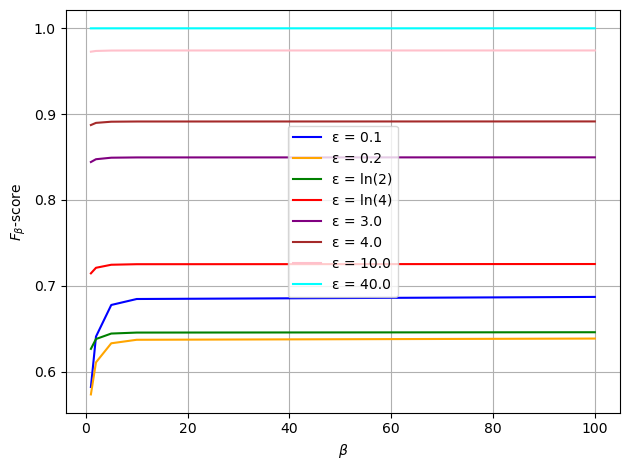

In [48]:
fig, ax = plt.subplots()
c1,c2,c3,c4,c5,c6,c7,c8 = "blue","orange","green","red","purple","brown","pink","cyan"
l1,l2,l3,l4,l5,l6,l7,l8 = "\u03b5 = 0.1", "\u03b5 = 0.2", "\u03b5 = ln(2)", "\u03b5 = ln(4)", "\u03b5 = 3.0", "\u03b5 = 4.0", "\u03b5 = 10.0", "\u03b5 = 40.0"

ax.set_xlabel('$\u03b2$')
ax.set_ylabel('$F_\u03b2$'+'-score')
ax.grid()
#ax.set_xlim(0,10)
ax.plot(beta, eps01_list, color=c1, label=l1)
ax.plot(beta, eps02_list, color=c2, label=l2)
ax.plot(beta, eps07_list, color=c3, label=l3)
ax.plot(beta, eps14_list, color=c4, label=l4)
ax.plot(beta, eps30_list, color=c5, label=l5)
ax.plot(beta, eps40_list, color=c6, label=l6)
ax.plot(beta, eps100_list, color=c7, label=l7)
ax.plot(beta, eps400_list, color=c8, label=l8)
ax.legend(loc=0)
fig.tight_layout()
plt.savefig('beta-fbeta1_sev.png')
plt.show()